<a href="https://colab.research.google.com/github/BanuB/Predict-Returns/blob/main/Casestudypredictreturns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forecast Stock Returns using time series

In [3]:
# prompt: Can you include standard libraries for data science project in the cell below?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# other potentially useful libraries
# import sklearn as skl
# import tensorflow as tf
# import torch


In [4]:
# prompt: can you  create code to read an xlsx file

# Assuming your xlsx file is named 'your_file.xlsx'
#file_path = 'https://raw.githubusercontent.com/BanuB/Predict-Returns/refs/heads/main/PredictorData2023_New_Monthly.csv'

file_path = 'https://github.com/BanuB/Predict-Returns/raw/refs/heads/main/PredictorData2023.xlsx'

try:
  df = pd.ExcelFile(file_path)
  #print(df.head()) # Print the first few rows to verify
  Monthly = df.parse('Monthly')
  Quarterly = df.parse('Quarterly')
  Annual = df.parse('Annual')
  print(Monthly.head())
  print(Quarterly.head())
  print(Annual.head())
except FileNotFoundError:
  print(f"Error: File '{file_path}' not found.")
except Exception as e:
  print(f"An error occurred: {e}")

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


   yyyymm  Index   D12  E12  b/m  tbl  AAA  BAA  lty  ntis     Rfree  infl  \
0  187101   4.44  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN       NaN   NaN   
1  187102   4.50  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004967   NaN   
2  187103   4.61  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004525   NaN   
3  187104   4.74  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004252   NaN   
4  187105   4.86  0.26  0.4  NaN  NaN  NaN  NaN  NaN   NaN  0.004643   NaN   

   ltr  corpr  svar  csp  CRSP_SPvw  CRSP_SPvwx  
0  NaN    NaN   NaN  NaN        NaN         NaN  
1  NaN    NaN   NaN  NaN        NaN         NaN  
2  NaN    NaN   NaN  NaN        NaN         NaN  
3  NaN    NaN   NaN  NaN        NaN         NaN  
4  NaN    NaN   NaN  NaN        NaN         NaN  
   yyyyq  Index   D12     E12  b/m  tbl  AAA  BAA  lty  cay  ...  infl  ltr  \
0  18711   4.61  0.26  0.4000  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN  NaN   
1  18712   4.82  0.26  0.4000  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN  N

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [5]:
# prompt: can you suggest code to report summary statistics of the above dataset called Monthly

# Display summary statistics for the 'Monthly' DataFrame
print(Annual.describe())

# Display data types of each column
print(Annual.dtypes)

# Display the number of missing values in each column
print(Annual.isnull().sum())

# Additional summary statistics (if needed)
# Example: correlation matrix
print(Annual.corr())

              yyyy        Index         D12         E12         b/m  \
count   153.000000   153.000000  153.000000  153.000000  103.000000   
mean   1947.000000   402.355263    7.896211   18.706998    0.536599   
std      44.311398   876.941573   14.531314   37.292103    0.260837   
min    1871.000000     3.250000    0.180000    0.160000    0.131218   
25%    1909.000000     7.950000    0.430000    0.580000    0.318702   
50%    1947.000000    17.660000    0.970000    1.610000    0.509828   
75%    1985.000000   211.280000    7.900000   14.880000    0.714402   
max    2023.000000  4769.830000   70.303692  197.870000    1.442084   

              tbl         AAA         BAA         lty           cay  ...  \
count  104.000000  105.000000  105.000000  105.000000  7.900000e+01  ...   
mean     0.033881    0.056110    0.068358    0.048483  6.329114e-12  ...   
std      0.029788    0.026251    0.028200    0.026297  3.545247e-02  ...   
min      0.000100    0.022600    0.031000    0.009300 -1

In [6]:
# prompt: can you suggest code to report summary statistics of the above dataset called Monthly

# Display summary statistics for the 'Monthly' DataFrame
print(Monthly.describe())

# Display data types of each column
print(Monthly.dtypes)

# Display the number of missing values in each column
print(Monthly.isnull().sum())

# Additional summary statistics (if needed)
# Example: correlation matrix
print(Monthly.corr())

              yyyymm        Index          D12          E12          b/m  \
count    1836.000000  1836.000000  1836.000000  1836.000000  1234.000000   
mean   194706.500000   384.435164     7.684714    18.134835     0.546800   
std      4417.839848   826.212670    14.076998    35.843124     0.262289   
min    187101.000000     2.730000     0.180000     0.160000     0.120510   
25%    190903.750000     7.950000     0.423975     0.575600     0.325655   
50%    194706.500000    18.085000     0.940000     1.563500     0.525394   
75%    198509.250000   191.152500     7.845000    15.013325     0.725419   
max    202312.000000  4769.830000    70.303692   197.910000     2.028478   

               tbl          AAA          BAA          lty         ntis  \
count  1248.000000  1260.000000  1260.000000  1260.000000  1165.000000   
mean      0.033454     0.056421     0.068124     0.049148     0.015600   
std       0.029641     0.026602     0.028228     0.026953     0.025834   
min       0.000100 

Cite Original Source for data descriptions: chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www-jstor-org.remote.baruch.cuny.edu/stable/pdf/40468327.pdf?refreqid=fastly-default%3A4e6ea701fce13c5755af961db6d86cf3&ab_segments=&initiator=&acceptTC=1

"The quarterly data are from Welch and Goyal (2008), who provide detailed descriptions of the data and their sources.12 Stock returns are measured as continuously compounded returns on the S&P 500 index, including dividends, and the Treasury bill rate is used to compute the equity premium. With respect to the economic variables used to predict the equity premium, we consider the 15 variables from Welch and Goyal (2008) for which quarterly data are available for 1947:1-2005:4.

Dividend-price ratio (log), **D/P**: Difference between the log of dividends paid on the S&P 500 index and the log of stock prices (S&P 500 index), where dividends are measured using a one-year moving sum.
• Dividend yield (log), **D/Y:** Difference between the log of dividends and the log of lagged stock price
• Earnings-price ratio (log), **E/P: **Difference between the log of earnings
 on the S&P 500 index and the log of stock prices, where earnings are
 measured using a one-year moving sum.
 • Dividend-payout ratio (log), **D/E**: Difference between the log of divi-
 dends and the log of earnings.
 • Stock variance, **SVAR**: Sum of squared daily returns on the S&P 500 index.
 • Book-to-market ratio, **B/M**: Ratio of book value to market value for the
 Dow Jones Industrial Average.
 • Net equity expansion, **NTIS**: Ratio of twelve-month moving sums of net
 issues by NYSE-listed stocks to total end-of-year market capitalization of
 NYSE stocks.
 • Treasury bill rate, **TBL**: Interest rate on a three-month Treasury bill (sec-
 ondary market).
 • Long-term yield, **LTY**: Long-term government bond yield.
 • Long-term return,** LTR**: Return on long-term government bonds.
 • Term spread, **TMS**: Difference between the long-term yield and the Trea-
 sury bill rate.
 • Default yield spread, **DFY:** Difference between BAA- and AAA-rated
 corporate bond yields.
 • Default return spread, **DFR:** Difference between long-term corporate bond
 and long-term government bond returns.
 • Inflation, **INFL**: Calculated from the CPI (all urban consumers); follow-
 ing Welch and Goyal (2008), since inflation rate data are released in the
 following month, we use jczí_i in Equation (1) for inflation.
 • Investment-to-capital ratio, **I/K: **Ratio of aggregate (private nonresiden-
 tial fixed) investment to aggregate capital for the entire economy (Cochrane
 1991)"




In [7]:
# prompt: can you suggest code to report summary statistics of the above dataset called Monthly

# Display summary statistics for the 'Monthly' DataFrame
print(Quarterly.describe())

# Display data types of each column
print(Quarterly.dtypes)

# Display the number of missing values in each column
print(Quarterly.isnull().sum())

# Additional summary statistics (if needed)
# Example: correlation matrix
print(Quarterly.corr())

              yyyyq        Index         D12         E12         b/m  \
count    612.000000   612.000000  612.000000  612.000000  412.000000   
mean   19472.500000   385.627795    7.722864   18.239428    0.550169   
std      442.026217   829.010290   14.159984   36.118218    0.264553   
min    18711.000000     2.730000    0.180000    0.160000    0.125209   
25%    19091.750000     7.987500    0.424375    0.578750    0.326717   
50%    19472.500000    18.255000    0.940000    1.581000    0.525692   
75%    19853.250000   196.707500    7.855000   15.032500    0.726256   
max    20234.000000  4769.830000   70.303692  197.910000    2.028478   

              tbl         AAA         BAA         lty           cay  ...  \
count  416.000000  420.000000  420.000000  420.000000  2.880000e+02  ...   
mean     0.033488    0.056425    0.068170    0.049075 -2.777778e-12  ...   
std      0.029714    0.026564    0.028218    0.027022  3.538382e-02  ...   
min      0.000100    0.022600    0.029400    0.

In [9]:
# prompt: Can you give me code to generate training and test sample on the "Quarterly" dataset using 2/3 and 2/3 rule and I need to select only records from March 1947 to December 2022

import pandas as pd

# Assuming 'Quarterly' DataFrame is already loaded as shown in the previous code

# Convert the 'Date' column to datetime objects if it's not already
#Quarterly['yyyyq'] = pd.to_datetime(Quarterly['yyyyq'])

# Filter data from March 1947 to December 2022
#start_date = pd.to_datetime('19471')
#end_date = pd.to_datetime('20224')
Quarterly_filtered = Quarterly[(Quarterly['yyyyq'] >= 19471) & (Quarterly['yyyyq'] <= 20224)]

# Calculate the split point for training and testing sets (2/3 rule)
train_size = int(len(Quarterly_filtered) * (2/3))

# Split into training and testing sets
Quarterly_train = Quarterly_filtered[:train_size]
Quarterly_test = Quarterly_filtered[train_size:]

print("Training set shape:", Quarterly_train.shape)
print("Testing set shape:", Quarterly_test.shape)

# Now you can use Quarterly_train and Quarterly_test for model training and evaluation.

Training set shape: (202, 22)
Testing set shape: (102, 22)


              yyyyq        Index         D12         E12         b/m  \
count    612.000000   612.000000  612.000000  612.000000  412.000000   
mean   19472.500000   385.627795    7.722864   18.239428    0.550169   
std      442.026217   829.010290   14.159984   36.118218    0.264553   
min    18711.000000     2.730000    0.180000    0.160000    0.125209   
25%    19091.750000     7.987500    0.424375    0.578750    0.326717   
50%    19472.500000    18.255000    0.940000    1.581000    0.525692   
75%    19853.250000   196.707500    7.855000   15.032500    0.726256   
max    20234.000000  4769.830000   70.303692  197.910000    2.028478   

              tbl         AAA         BAA         lty           cay  ...  \
count  416.000000  420.000000  420.000000  420.000000  2.880000e+02  ...   
mean     0.033488    0.056425    0.068170    0.049075 -2.777778e-12  ...   
std      0.029714    0.026564    0.028218    0.027022  3.538382e-02  ...   
min      0.000100    0.022600    0.029400    0.

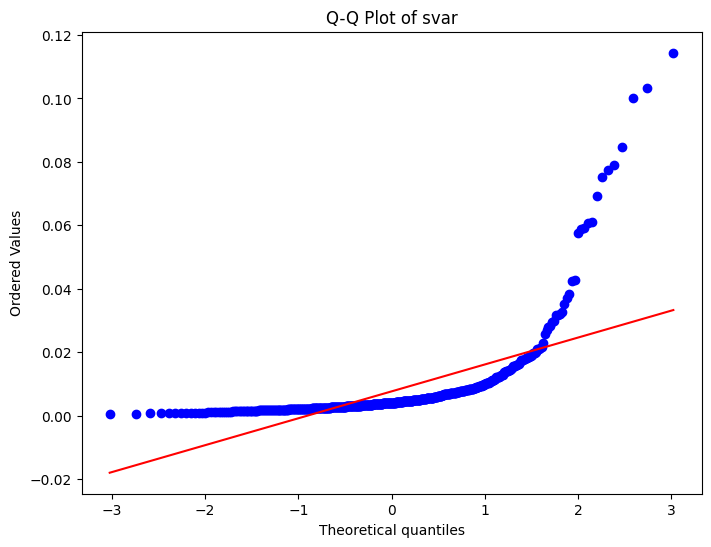

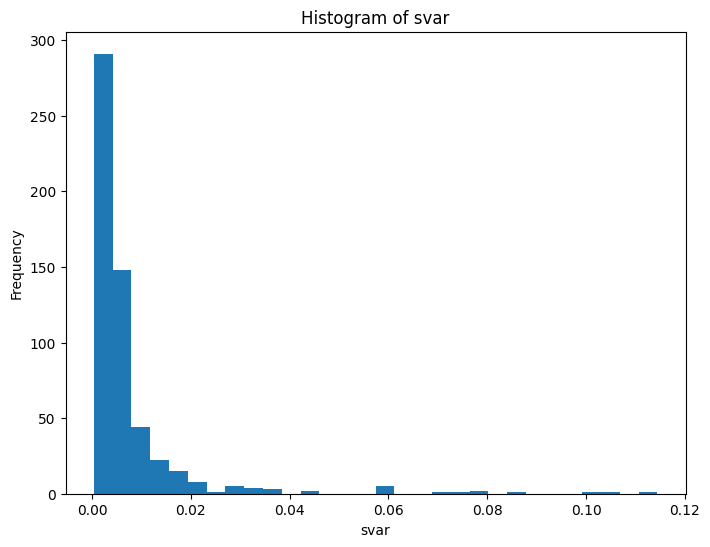

In [10]:
# prompt: can you give me code to view summary statistics such as skewness, kurtosis on the variables in the "Quarterly" dataset above? Also code for q-q plot and histogram for the svar variable

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis

# ... (Your existing code for loading the data)

# Summary statistics, skewness, and kurtosis for Quarterly data
print(Quarterly.describe())
print("\nSkewness:")
print(skew(Quarterly.dropna())) # Handle potential NaN values
print("\nKurtosis:")
print(kurtosis(Quarterly.dropna())) # Handle potential NaN values


# Q-Q plot for 'SVAR'
plt.figure(figsize=(8, 6))
stats.probplot(Quarterly['svar'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot of svar")
plt.show()

# Histogram for 'SVAR'
plt.figure(figsize=(8, 6))
plt.hist(Quarterly['svar'].dropna(), bins=30)  # Adjust the number of bins as needed
plt.title("Histogram of svar")
plt.xlabel("svar")
plt.ylabel("Frequency")
plt.show()

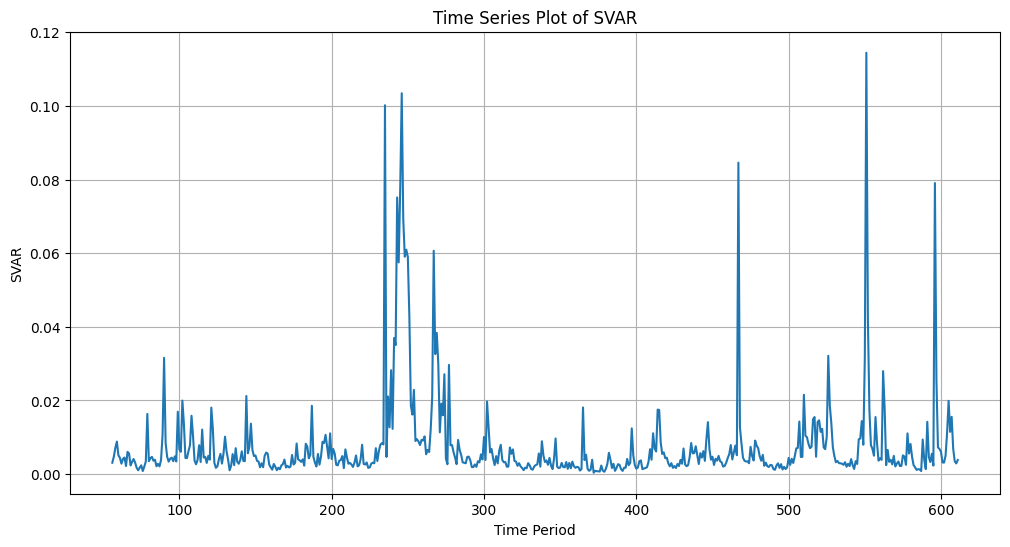

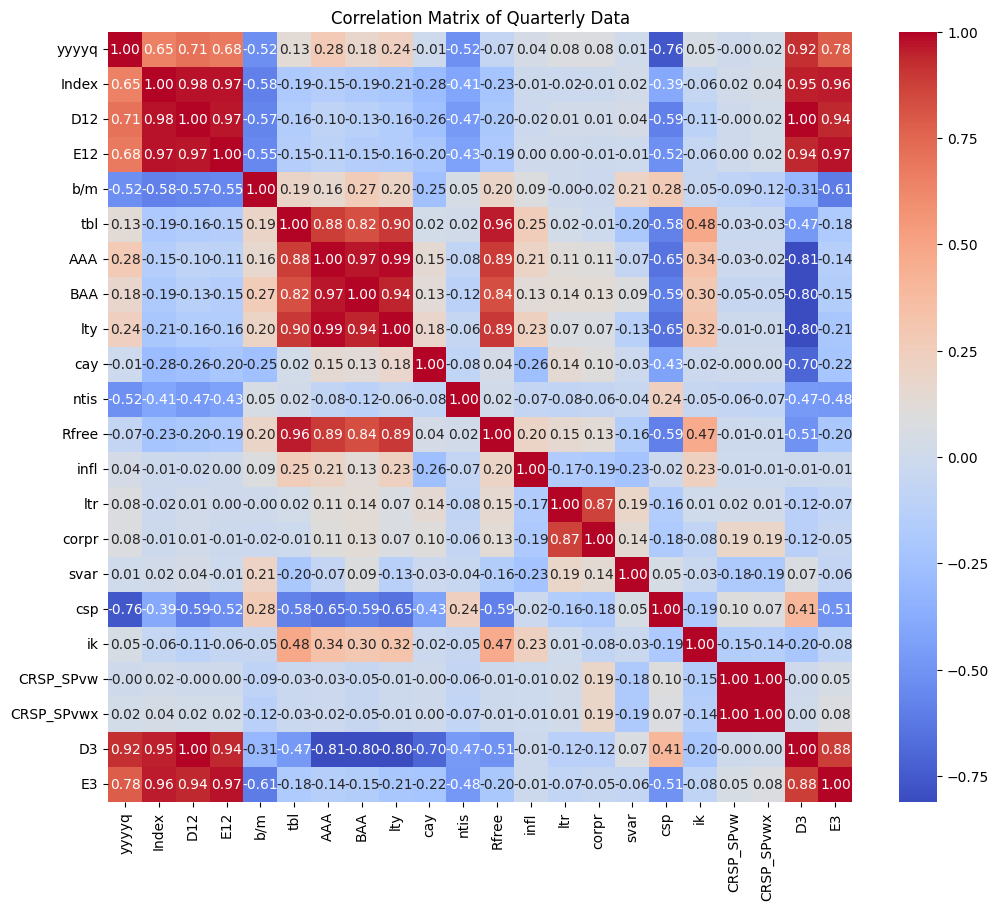


Kurtosis:
28.746548484795504

Kurtosis:
4.933445988165252


In [14]:
# prompt: can you give me code to plot the timeseries "svar" and can you code to plot correlation values on the "Quarterly" dataset variables

# Plot the time series 'svar'
plt.figure(figsize=(12, 6))
plt.plot(Quarterly.index, Quarterly['svar'])
plt.xlabel("Time Period")
plt.ylabel("SVAR")
plt.title("Time Series Plot of SVAR")
plt.grid(True)
plt.show()

# Plot correlation matrix for Quarterly data
plt.figure(figsize=(12, 10))
sns.heatmap(Quarterly.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Quarterly Data")
plt.show()

print("\nKurtosis:")
print(kurtosis(Quarterly.svar.dropna())) # Handle potential NaN values


print("\nSkew:")
print(skew(Quarterly.svar.dropna())) # Handle potential NaN values

In [12]:
# prompt: Can you suggest OLS regression code for my quarterly dataset above?

import statsmodels.api as sm

# Assuming 'Quarterly_train' and 'Quarterly_test' DataFrames are already prepared
# and 'ret' is the dependent variable, and other columns are independent variables

# Define dependent and independent variables
y_train = Quarterly_train['ret']
X_train = Quarterly_train[['dp', 'dy', 'ep', 'de', 'svar', 'bm', 'ntis', 'tbl', 'lty', 'ltr', 'tms', 'dfy', 'dfr', 'infl', 'ik']]  # Replace with your actual independent variables

# Add a constant to the independent variables
X_train = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the model summary
print(results.summary())

# Make predictions on the test set
y_test = Quarterly_test['ret']
X_test = Quarterly_test[['dp', 'dy', 'ep', 'de', 'svar', 'bm', 'ntis', 'tbl', 'lty', 'ltr', 'tms', 'dfy', 'dfr', 'infl', 'ik']]
X_test = sm.add_constant(X_test)
predictions = results.predict(X_test)

# Evaluate the model (example: R-squared)
print(f"R-squared on test set: {results.rsquared}")


#Further analysis and model diagnostics can be done here.

KeyError: 'ret'

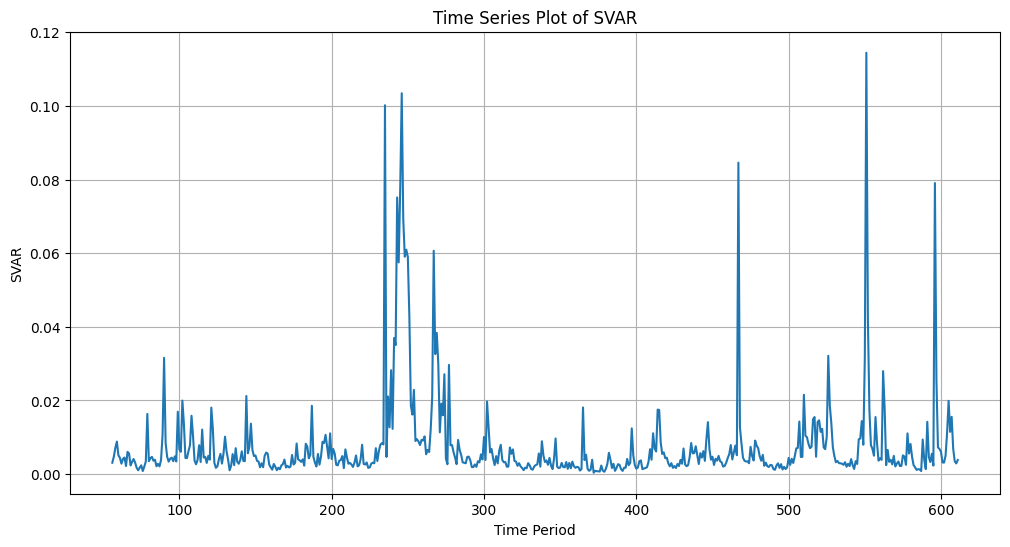

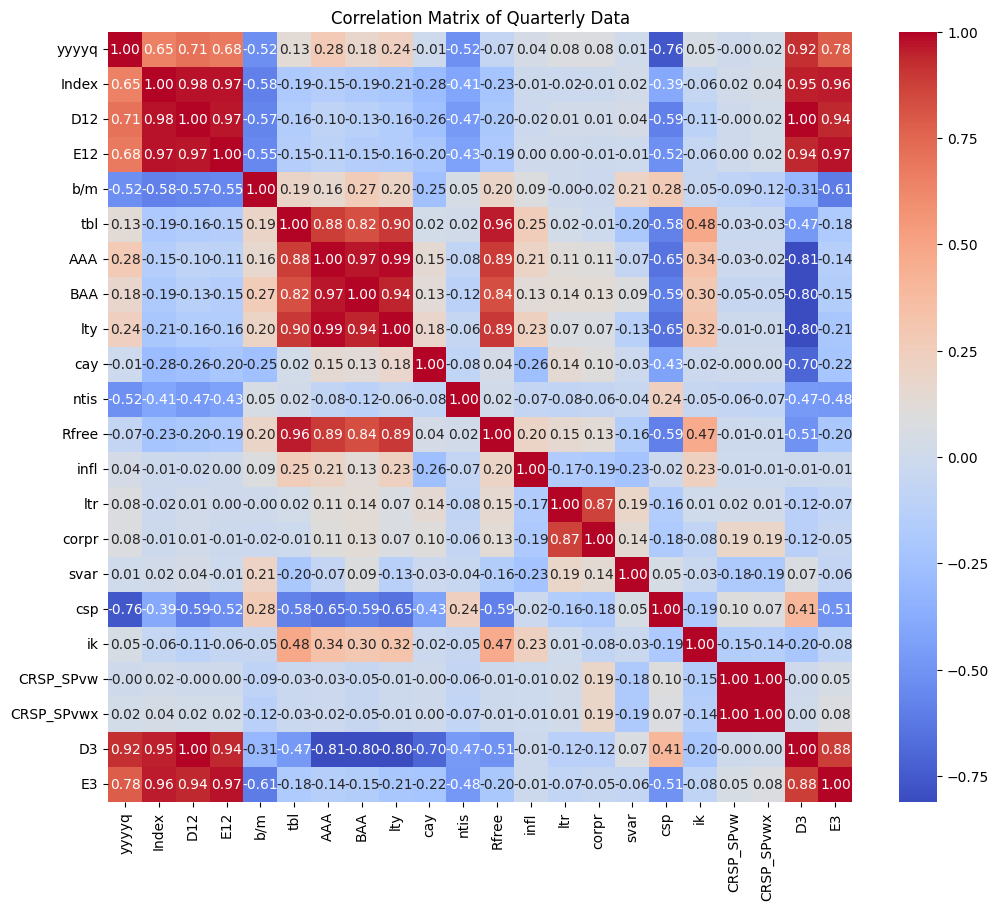


Kurtosis:
28.746548484795504

Kurtosis:
4.933445988165252
